In [53]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = './butterflies'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')


In [54]:
# 이미지 데이터 전처리를 위한 generator를 생성
# rescale 인자로는 이미지의 픽셀 값을 조정 (원래의 RGB 값은 0-255인데, 이를 0-1 사이로 조정)
image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.5, #회전
    zoom_range=0.5, #확대
    # width_shift_range=0.2, #이동
    # height_shift_range=0.2, #이동
    shear_range=0.15, # 굴절 
    horizontal_flip=True, # 가로반전
    validation_split=0.2,)

validation_image_generator = ImageDataGenerator(rescale=1./255.0,validation_split=0.2)


# 학습 이미지 데이터
train_data = image_gen.flow_from_directory(
    train_dir, # 여기에는 실제 이미지 데이터가 저장되어 있는 폴더 경로
    target_size=(150, 150), # 모든 이미지는 150x150 크기로 
    batch_size=32, 
    class_mode='categorical', # '나비1', '나비2', '나비3', '나비4'와 같이 여러 클래스를 카테고리모드
    subset='training' # 이는 학습 데이터를 불러온다는 것을 의미
)

# 검증 이미지 데이터를 불러옵니다.
val_data = validation_image_generator.flow_from_directory(
    validation_dir, # 여기에는 실제 이미지 데이터가 저장되어 있는 폴더 경로
    target_size=(150, 150), # 모든 이미지는 150x150 크기로 
    batch_size=32, 
    class_mode='categorical', # '나비1', '나비2', '나비3', '나비4'와 같이 여러 클래스를 분류하는 문제
    subset='validation' # 이는 검증 데이터를 불러오기
)

Found 1440 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [55]:
# 필요한 라이브러리들
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Convolutional Neural Network (CNN) 모델
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # input_shape는 이미지의 크기와 색상 채널에 맞게 조정해야 합니다. 이 예제에서는 150x150 크기의 RGB 이미지를 사용합니다.
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax') # 나비 종류에 맞게 설정
])

# 모델을 컴파일합니다. 손실함수, 최적화 알고리즘, 평가 지표를 설정
model.compile(loss='categorical_crossentropy', # 분류 문제이므로 categorical_crossentropy를 사용
              optimizer='adam', 
              metrics=['accuracy'])

# 모델의 구조를 확인합니다.
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 17, 17, 128)     

In [56]:
# 학습을 시작합니다. 여기서는 에포크(epoch)를 100으로 설정
history = model.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
45/45 [==============================] - 24s 494ms/step - loss: 0.7185 - accuracy: 0.5625 - val_loss: 0.6788 - val_accuracy: 0.5750
Epoch 2/50
45/45 [==============================] - 22s 493ms/step - loss: 0.5741 - accuracy: 0.7236 - val_loss: 0.8100 - val_accuracy: 0.5750
Epoch 3/50
45/45 [==============================] - 22s 478ms/step - loss: 0.5850 - accuracy: 0.7069 - val_loss: 0.6048 - val_accuracy: 0.6750
Epoch 4/50
45/45 [==============================] - 22s 477ms/step - loss: 0.5572 - accuracy: 0.7167 - val_loss: 0.7028 - val_accuracy: 0.6333
Epoch 5/50
45/45 [==============================] - 22s 475ms/step - loss: 0.5300 - accuracy: 0.7458 - val_loss: 0.7688 - val_accuracy: 0.5750
Epoch 6/50
45/45 [==============================] - 22s 476ms/step - loss: 0.5247 - accuracy: 0.7437 - val_loss: 0.7516 - val_accuracy: 0.5833
Epoch 7/50
45/45 [==============================] - 22s 482ms/step - loss: 0.5118 - accuracy: 0.7500 - val_loss: 0.7073 - val_accuracy: 0.5750

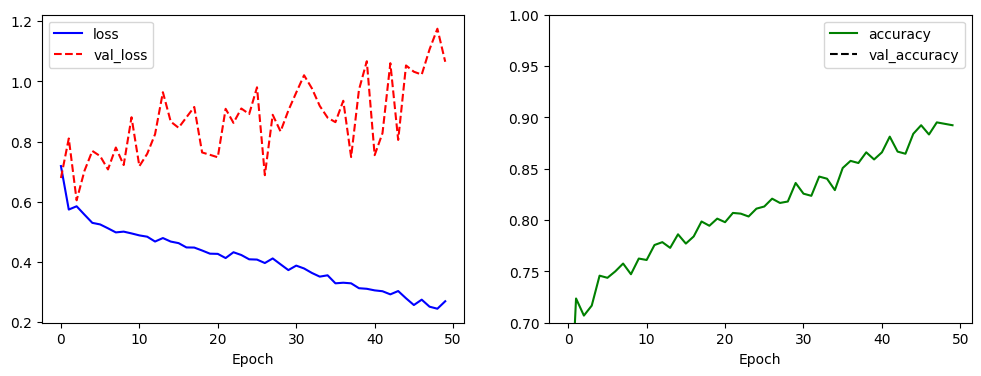

In [57]:
# 훈련 데이터와 검증 데이터에 대한 모델의 손실값을 그래프로
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# 훈련 데이터와 검증 데이터에 대한 모델의 정확도를 그래프로
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()




In [58]:

# 모델 예측값------------------------------
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = './imagePrediction/sample1.JPG' 
img = image.load_img(img_path, target_size=(150, 150))
# 이미지를 모델에 입력할 수 있는 형태로 변환
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# 이미지에 대한 예측을 수행합니다.
sample1 = model.predict(x)
img_path = './imagePrediction/sample2.JPG' 
img = image.load_img(img_path, target_size=(150, 150))
# 이미지를 모델에 입력할 수 있는 형태로 변환
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
sample2 = model.predict(x)

# 새로운 이미지
img_path = './imagePrediction/1.JPG' 
img = image.load_img(img_path, target_size=(150, 150))
# 이미지를 모델에 입력할 수 있는 형태로 변환
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
predictions1 = model.predict(x)
# 새로운 이미지
img_path = './imagePrediction/2.JPG' 
img = image.load_img(img_path, target_size=(150, 150))
# 이미지를 모델에 입력할 수 있는 형태로 변환
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
predictions2 = model.predict(x)

# 예측 결과를 출력
print(predictions1)
print(predictions2)
print(sample1)
print(sample2)
# 모델 예측값------------------------------



1/1 [==============================] - 0s 40ms/step
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[0. 1.]]


In [59]:
# 모델의 가중치를 확인
weights = model.get_weights()
print(weights)
print(weights[0].shape)
print(weights[1].shape)

[array([[[[ 2.29782369e-02,  9.46207643e-02, -4.41272184e-02,
           1.58134475e-01,  3.85238938e-02,  7.37714767e-02,
           1.76244490e-02, -7.56814852e-02,  5.49447723e-02,
           1.41705185e-01, -7.41320699e-02,  5.05917817e-02,
           1.46391228e-01,  3.21262935e-03,  1.14419408e-01,
          -1.61891282e-01,  1.16728276e-01,  5.94113842e-02,
           8.27596523e-03, -1.15945458e-01,  1.90850273e-01,
          -2.05515817e-01,  1.36626035e-01,  1.34570837e-01,
          -2.79745106e-02, -6.97298348e-02, -6.45442749e-04,
           2.88539398e-02, -1.46660209e-01,  2.07189977e-01,
          -7.65961111e-02, -1.63662937e-02],
         [-9.41960365e-02, -1.69784967e-02,  3.04932240e-02,
          -5.57522662e-02,  1.29112586e-01, -6.02204874e-02,
          -6.26867414e-02,  6.27834797e-02,  1.30022243e-01,
          -1.22262537e-01,  1.00990973e-01, -1.77288111e-02,
          -2.51623662e-03,  1.19317681e-01,  1.25793731e-02,
           1.26778074e-02, -1.34677729e